# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`

> "Hi Team! 👋

> The current notebook contains 10 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr
import pandas_datareader.data as web


import datetime
import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between the 13th of October 2014 through the 13th of September 2022 (nine years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM

In [3]:
WMT = yf.download("WMT", start="2014-10-13", end="2022-09-14")
IBM = yf.download("IBM", start="2014-10-13", end="2022-09-14")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
WI = pd.concat([IBM["Adj Close"],WMT["Adj Close"]],axis=1)
WI.columns = ["IBM","WMT"]
WI

,IBM,WMT
Date,,
2014-10-13,118.635635,64.138145
2014-10-14,118.816643,64.485458
2014-10-15,117.491440,62.186531
2014-10-16,116.256721,61.045338
2014-10-17,117.685364,61.276890
...,...,...
2022-09-07,121.597435,133.693283
2022-09-08,122.321053,134.372849
2022-09-09,123.006599,134.776672


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

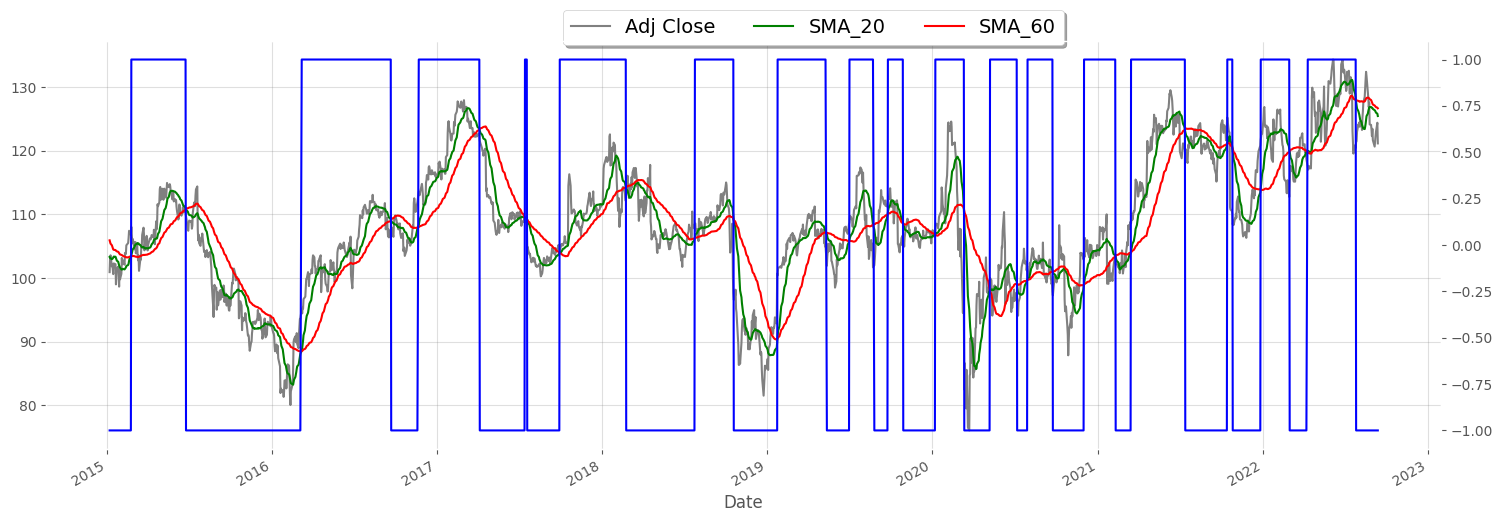

In [5]:
IBM["SMA_20"] =\
(
    IBM
    ["Adj Close"]
    .rolling(window = 20)
    .mean()
)

IBM["SMA_60"] =\
(
    IBM
    ["Adj Close"]
    .rolling(60)
    .mean()
)

IBM["positions"] =\
(
    np
    .where(IBM["SMA_20"] > IBM["SMA_60"],
           1, -1)
)

IBM =\
(
    IBM
    .dropna()
)

ax =\
(
    IBM
    [["Adj Close", 
      "SMA_20", 
      "SMA_60", 
      "positions"]]
    .plot(secondary_y = "positions",
          style = ["grey", 
                   "green",
                   "red",
                   "blue"],
          figsize = [18, 6]
         )
)

(
    ax
    .legend(loc = "upper center",
            shadow = True,
            ncol = 4,
            bbox_to_anchor = (0.55, 1.10),
            fancybox = True)
)

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

C:\Users\bryan\AppData\Local\Temp\ipykernel_26480\1513413363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM["log_returns"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_26480\1513413363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM["strategy_returns"] =\


<Axes: xlabel='Date'>

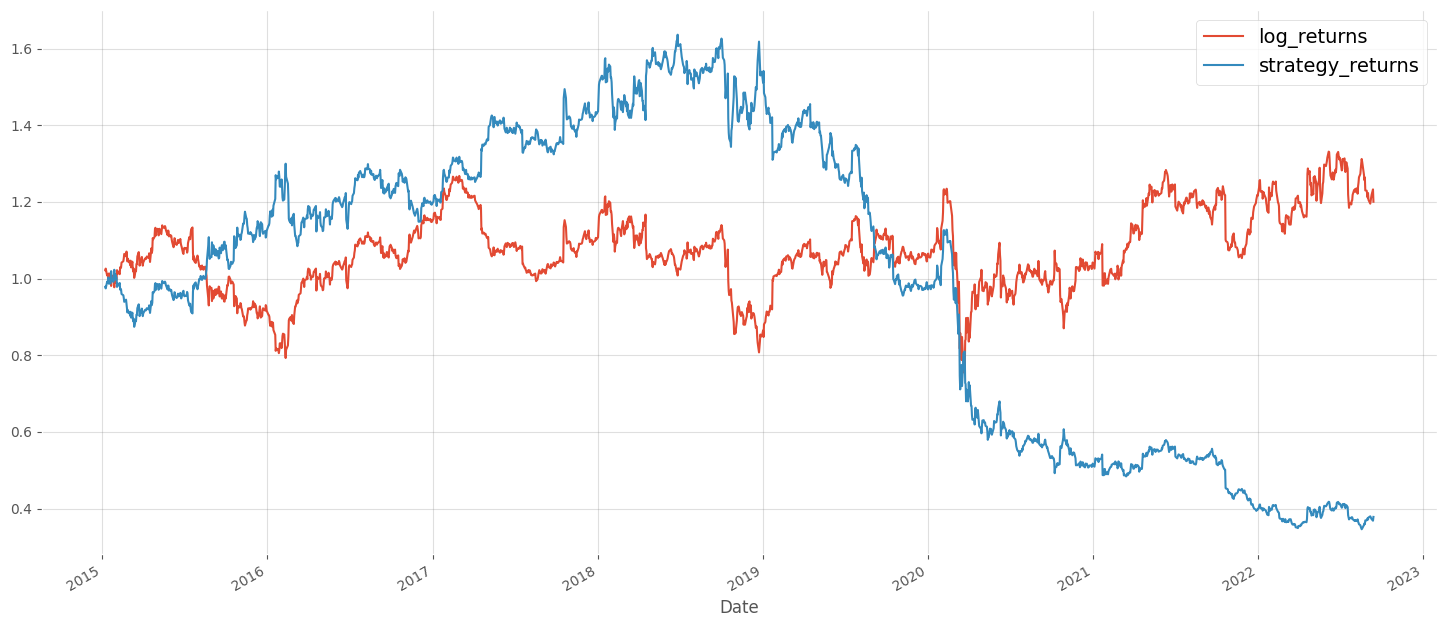

In [6]:
IBM["log_returns"] =\
(
    np
    .log(IBM["Adj Close"] / IBM["Adj Close"].shift(1)
        )
)

IBM["strategy_returns"] =\
(
    IBM["positions"]
    .shift(1) 
    * 
    IBM["log_returns"]
)

(
    IBM
    [["log_returns", "strategy_returns"]]
    .cumsum()
    .apply(np.exp)
).plot(figsize = [18, 8]
      )

### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

C:\Users\bryan\AppData\Local\Temp\ipykernel_26480\2745945842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM["cumulative_returns"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_26480\2745945842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM["max_gross_performance"] =\


<Axes: xlabel='Date'>

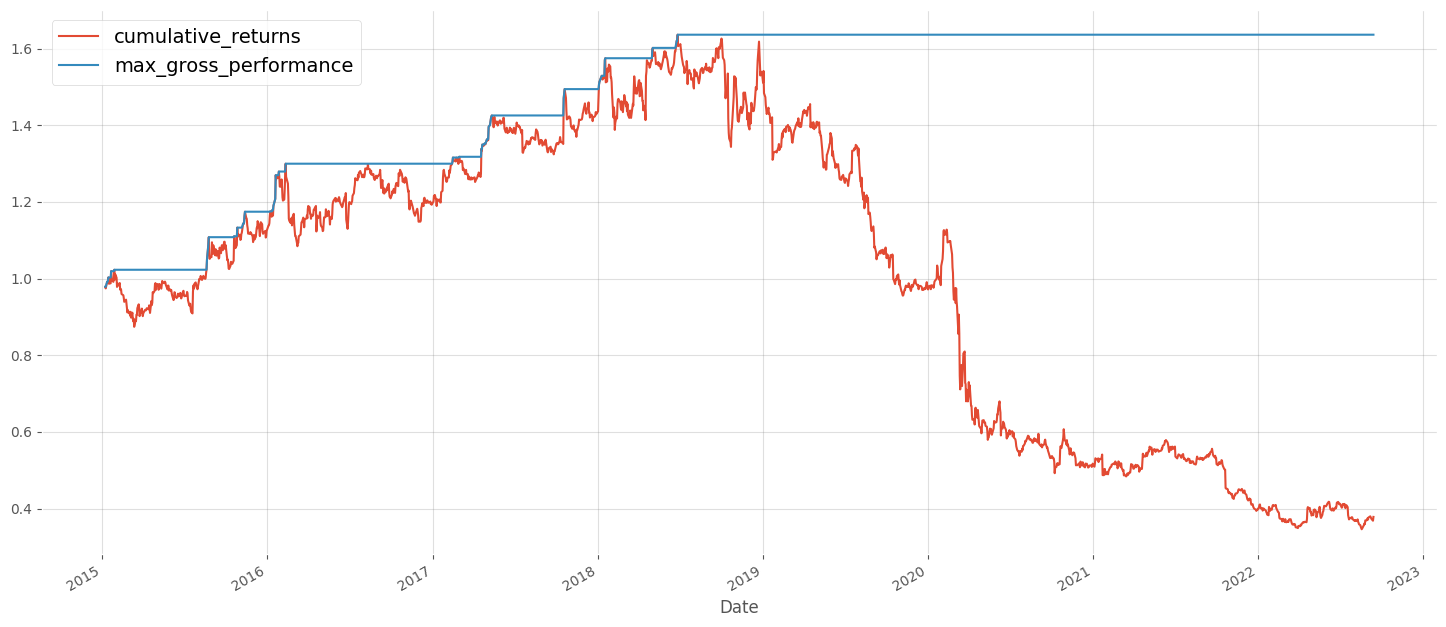

In [7]:
IBM["cumulative_returns"] =\
(
    IBM["strategy_returns"]
    .cumsum()
    .apply(np.exp)
)

IBM["max_gross_performance"] =\
(
    IBM
    ["cumulative_returns"]
    .cummax()
)

(
    IBM
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)


In [8]:
drawdown = IBM["max_gross_performance"] - IBM["cumulative_returns"]
print(drawdown.max())

periods =\
(
    drawdown[drawdown == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown[drawdown == 0].index[   : -1].to_pydatetime()
)
print(periods.max())

1.2901815783568946
369 days, 0:00:00


### Please make sure to answer below.

    The maximum drawdown is about 129 percentage points.
    The longest drawdown period lasts for 369 days.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

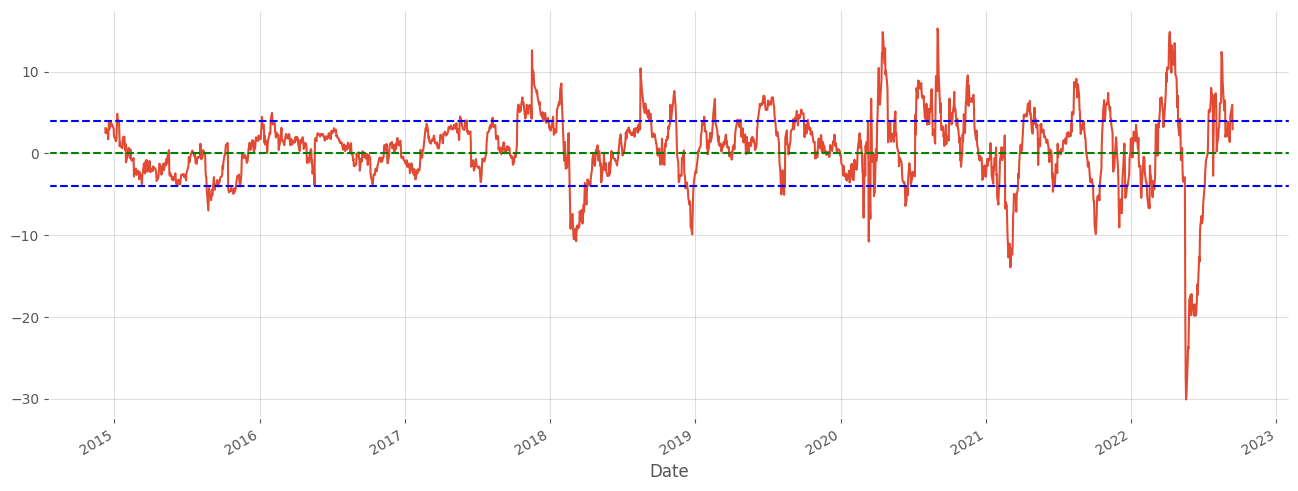

In [9]:
WMT["RETURNS"] =\
(np
    .log(WMT["Adj Close"] 
         /
         WMT["Adj Close"]
         .shift(1)
        )
)

WMT["SMA_41"] =\
(
    WMT["Adj Close"]
    .rolling(window = 41)
    .mean()
)

WMT["distance"] = WMT["Adj Close"] - WMT["SMA_41"]

threshold = 4

(WMT["distance"]
 .dropna()
 .plot(figsize = [16, 6]
      )
)

plt.axhline(threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "blue", ls = "--")

### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

<Axes: xlabel='Date'>

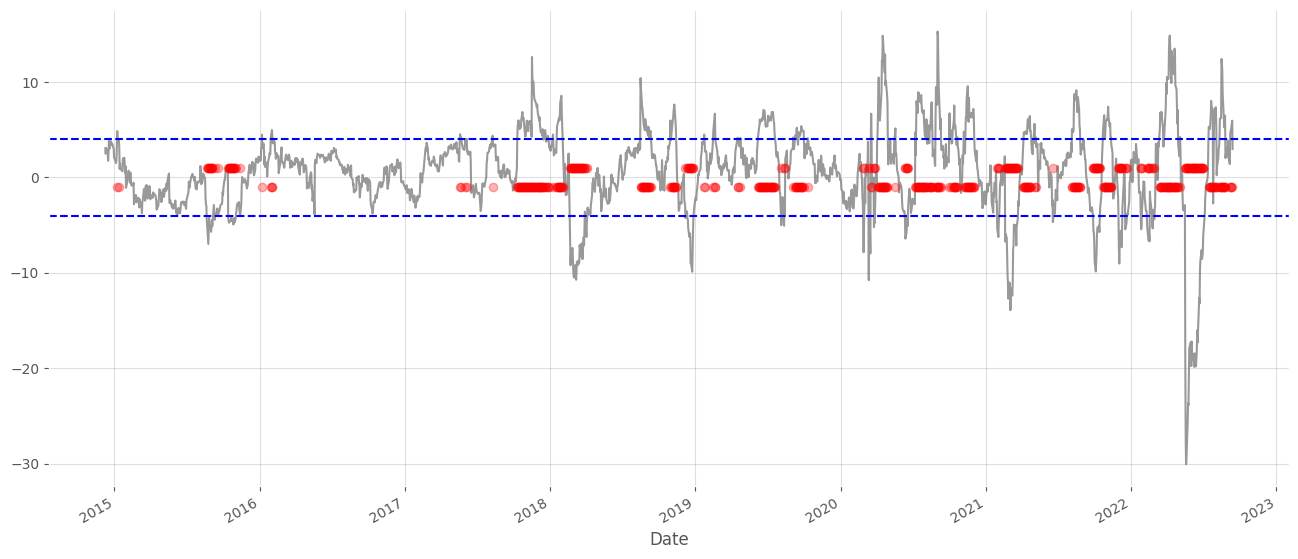

In [10]:
(
WMT["distance"]
.dropna()
.plot(figsize = [16, 7],
      color = "grey",
      alpha = 0.80)
)

# Upper-bound threshold

plt.axhline(4,
            color = "blue",
            ls = "--")

# Lower-bound threshold

plt.axhline(-4,
            color = "blue",
            ls = "--")

# Sell Signal

WMT["positions"] =\
(
    np
    .where(WMT["distance"] > 4,
           -1, np.nan)
)

# Buy Signal

WMT["positions"] =\
(
    np
    .where(WMT["distance"] < -4,
           1, WMT["positions"])
)

(
    WMT["positions"]
    .dropna()
    .plot(figsize = [16 , 7],
          color = "red",
          style = "o",
          alpha = 0.30)
)

<Axes: xlabel='Date'>

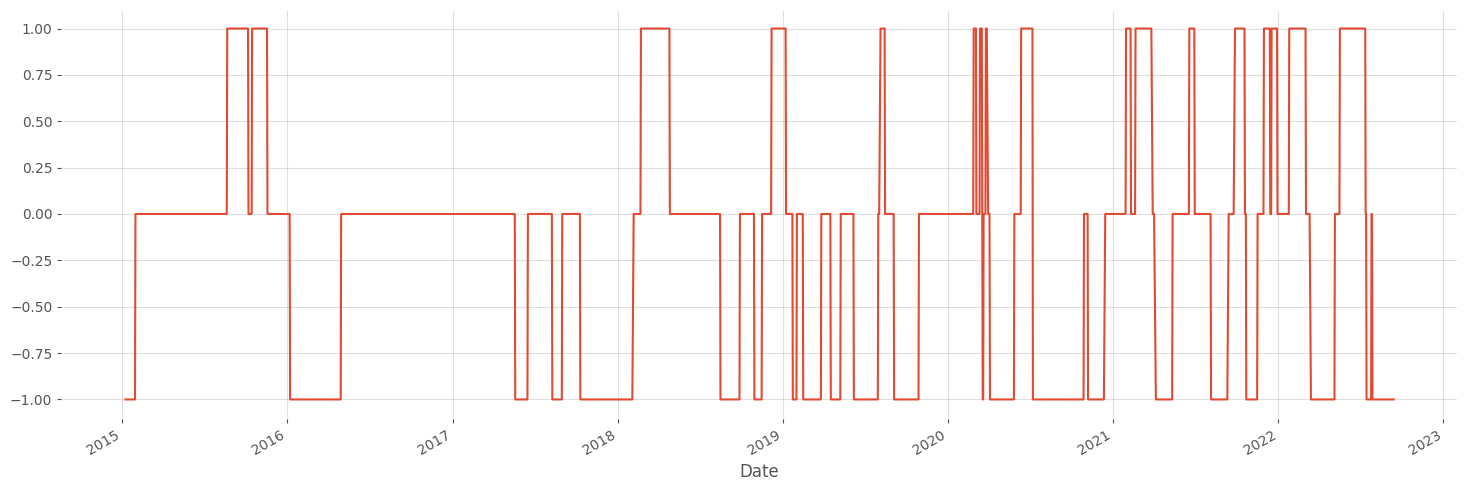

In [11]:
col         = 'distance'
conditions  = [ WMT[col] >= threshold, WMT[col] * WMT[col].shift(1) < 0, WMT[col] <= -threshold ]
choices     = [ -1, 0, 1 ]
    
WMT['trading_positions'] = np.select(conditions, choices, np.nan)

WMT["trading_positions"] =\
    (WMT["trading_positions"]
     .ffill()
    )

(
    WMT["trading_positions"]
    .iloc[41: ]
    .plot(figsize = [18, 6],
          ylim = [-1.10, 1.10]
         )
)

In [12]:
num_changes = np.sum((WMT["trading_positions"].shift() != WMT["trading_positions"]) & (WMT["trading_positions"] == -1))

print(num_changes)

22


### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were 22 trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

<Axes: xlabel='Date'>

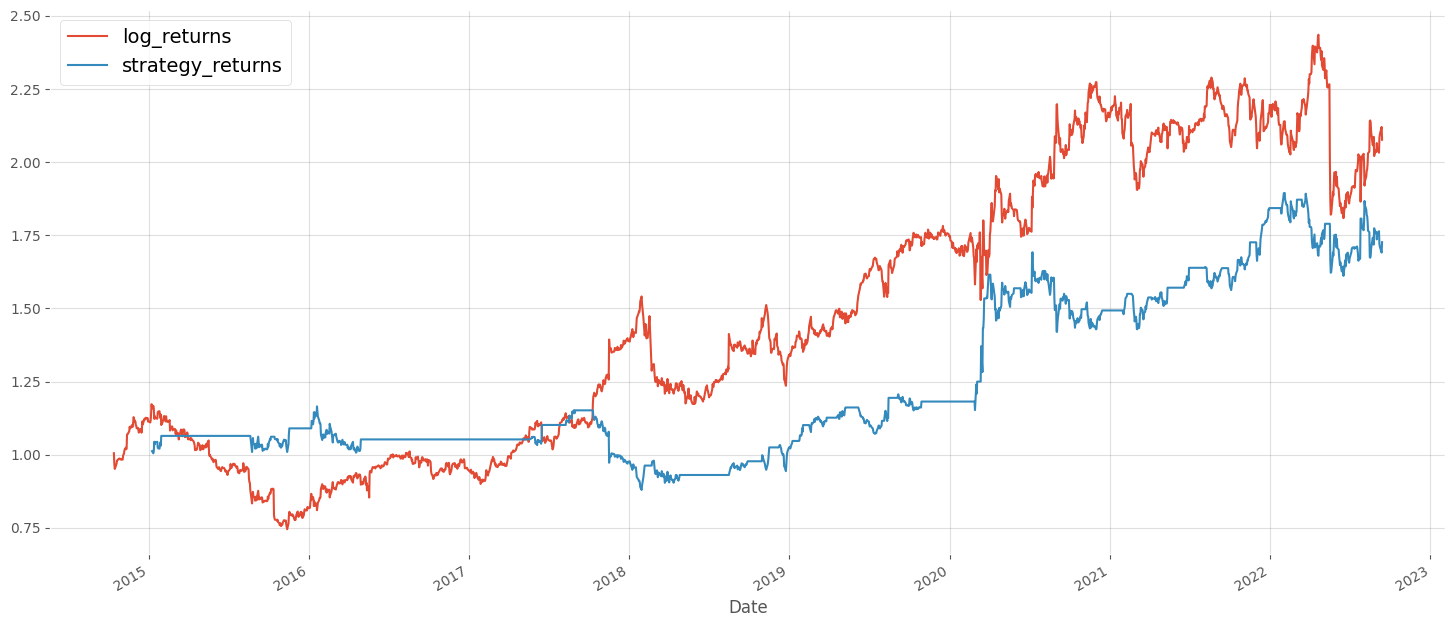

In [13]:
WMT["log_returns"] =\
(
    np
    .log(WMT["Adj Close"] / WMT["Adj Close"].shift(1)
        )
)

WMT["strategy_returns"] =\
(
    WMT["trading_positions"]
    .shift(1) 
    * 
    WMT["log_returns"]
)

(
    WMT
    [["log_returns", "strategy_returns"]]
    .cumsum()
    .apply(np.exp)
).plot(figsize = [18, 8]
      )

### <font color = red> Question 8</font>. Please calculate the Sharpe Ratio of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of -0.5116548771370751 . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of 0.43999705127827154 .

In [14]:
IBM_Sharpe =\
(
    np.sqrt(253) * (IBM["strategy_returns"] .mean() / IBM["strategy_returns"] .std()
                    )
)

IBM_Sharpe

-0.511654930189878

In [15]:
WMT_Sharpe =\
(
    np.sqrt(253) * (WMT["strategy_returns"].mean() / WMT["strategy_returns"].std()
                    )
)

WMT_Sharpe

0.4399962563174369

### <font color = red> Question 9</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a CAGR of 0.024064021332182106 . 

    Mean reversion strategy for WMT leads to a CAGR of 0.09970780735869145 .


In [16]:
days =\
(    (IBM.index[-1] - IBM.index[0])
     .days
)

IBM_CAGR =\
(
    (
      (
        (IBM["Adj Close"][-1]) / (IBM["Adj Close"][0])
      )
        **(365.0/days) 
    ) 
    - 1
)

IBM_CAGR

C:\Users\bryan\AppData\Local\Temp\ipykernel_26480\116777971.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (IBM["Adj Close"][-1]) / (IBM["Adj Close"][0])


0.024064019649684187

In [17]:
WMT_CAGR =\
(
    (
      (
        (WMT["Adj Close"][-1]) / (WMT["Adj Close"][0])
      )
        **(365.0/days) 
    ) 
    - 1
)

WMT_CAGR

C:\Users\bryan\AppData\Local\Temp\ipykernel_26480\234181863.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (WMT["Adj Close"][-1]) / (WMT["Adj Close"][0])


0.09970775631083573

### <font color = red> Question 10</font>. This question is based on the following scenario. After reading it, please respond to the associated sub-questions.
​
> Scenario: You've been appointed as a Quantitative Researcher in the process-driven investing division of a leading hedge fund. As part of your onboarding challenge, you are handed data (`alphas.csv`) for three experimental trading models, codenamed Alphas A, B, and C. These models, each initiated with a capital of 100K, demonstrate nearly identical Sharpe ratios across a span of 1120 trading days. Intrigued by this uniformity yet aware of the Sharpe ratio's shortcomings, you embark on a journey to dissect the Alphas' performance through a multifaceted quantitative lens.
​

In [18]:
df_alphas = pd.read_csv('alphas.csv')
df_alphas.head()

FileNotFoundError: [Errno 2] No such file or directory: 'alphas.csv'

In [ ]:
df_alphas.columns

> 10-1. Sharpe Ratio Diagnostics:

- Given the daily return series for Alphas A, B, and C:

- Derive the annualized Sharpe ratio for each Alpha, with the industry-standard assumption of 252 trading days per annumm. In light of these findings, how might you reconsider the perceived risk-adjusted returns of these models?

In [ ]:
df = df_alphas.drop('Unnamed: 0',axis = 1)
daily_returns = df.pct_change()

# Calculate the mean logarithmic returns for each model
log_ret_a = np.mean(np.log(1 + daily_returns['Alphas A'])) * 252
log_ret_b = np.mean(np.log(1 + daily_returns['Alphas B'])) * 252
log_ret_c = np.mean(np.log(1 + daily_returns['Alphas C'])) * 252

# Calculate the standard deviations of the daily returns for each model
std_dev_a = np.std(daily_returns['Alphas A']) * 252 ** 0.5
std_dev_b = np.std(daily_returns['Alphas B']) * 252 ** 0.5
std_dev_c = np.std(daily_returns['Alphas C']) * 252 ** 0.5

# Calculate the Sharpe ratios for each model
sharpe_ratio_a = log_ret_a / std_dev_a
sharpe_ratio_b = log_ret_b / std_dev_b
sharpe_ratio_c = log_ret_c / std_dev_c

print("Sharpe Ratio for Alpha A:", sharpe_ratio_a)
print("Sharpe Ratio for Alpha B:", sharpe_ratio_b)
print("Sharpe Ratio for Alpha C:", sharpe_ratio_c)

A negative Sharpe ratio indicates that the expected return is less than the risk involved, which means that the model has a lower performance compared to other similar ones with higher risk levels. In other words, the model does not provide enough value for the amount of risk taken.

Therefore, we can conclude that Alpha A, B, and C are not suitable for investing due to their low Sharpe ratios.

> 10-2. Trajectory of Cumulative Returns:
    
- Visualize and compare the cumulative returns of each Alpha.


In [ ]:
plt.figure(figsize=(15,6))
for alpha in ['A', 'B', 'C']:
    plt.plot(df[f'Alphas {alpha}'], label=alpha)
plt.legend()
plt.title("Cumulative Returns")
plt.xlabel("Days")
plt.ylabel("Returns")
plt.show()

Alpha A started out earning more but then lost in towards the end. Alpha B was fluctuated less than the others. Alpha C lost in the beggining and started gaining at 500 days but then quiclkly lost it. All alphas ended up with similar returns at the end

> 10-3. Cumulative Returns Over a 1120-Day Horizon:
- Extrapolate the cumulative returns for each Alpha over this period. When evaluating based on the Compound Annual Growth Rate (CAGR), how do these Alphas stack up against one another?

In [ ]:
Days = 1120
CAGR_A = ((df['Alphas A'][1120] / df['Alphas A'][1])**(365/Days))-1
CAGR_B = ((df['Alphas B'][1120] / df['Alphas B'][1])**(365/Days))-1
CAGR_C = ((df['Alphas C'][1120] / df['Alphas C'][1])**(365/Days))-1

print("CAGR for Alpha A:", CAGR_A)
print("CAGR for Alpha B:", CAGR_B)
print("CAGR for Alpha C:", CAGR_C)


All 3 alphas have negative CAGR. Alpha A has the highest CAGR.

> 10.4 Delving into Maximum Drawdown (MDD):
- Assess the Maximum Drawdown (MDD) for each model within this time frame. Based on this assessment, which Alpha appears best equipped to withstand market downturns?

In [ ]:
returns = df[['Alphas A', 'Alphas B', 'Alphas C']]
drawdowns = {}
for alpha in ['Alphas A', 'Alphas B', 'Alphas C']:
    drawdowns[alpha] = []
    max_stock = 0
    min_stock = 100
    current_current = 0
    for i in range(len(returns)):
        current_stock = returns.iloc[i][alpha]
        if current_stock > max_stock:
            max_stock = current_stock
        elif current_stock < min_stock:
            min_stock = current_stock
            
        current_dd = 0
        
    max_dd = max_stock-min_stock
    max_dd = max_dd/max_stock
    drawdowns[alpha].append(max_dd)
print("Maximum Drawdowns:", drawdowns)

Alphas B appears best equipped to withstand market downturns as it has the lowest MD out of all 3 alphas.

> 10.5 Examining Drawdown Duration:
- Analyze the longest drawdown durations for each strategy. Which of the Alphas seems to have the quickest recovery mechanism following a significant drawdown?

In [ ]:
returns = df[['Alphas A', 'Alphas B', 'Alphas C']]
drawdowns = {}
for alpha in ['Alphas A', 'Alphas B', 'Alphas C']:
    drawdowns[alpha] = []
    max_dd = 0
    current_dd = 0
    duration = 0
    current_duration = 0
    for i in range(len(returns)):
        current_dd = returns.iloc[i][alpha]
        if current_dd > max_dd:
            max_dd = current_dd
            current_duration = 0
        else:
            current_duration += 1
            
        if current_duration > duration:
            duration = current_duration
    drawdowns[alpha].append(duration)
print("Maximum Drawdowns:", drawdowns)

In [ ]:
len(returns)

Alphas C has the quickest recovery as it has the lowest MDD.

> 10.6 Comprehensive Assessment of Strategy Performance:
- By synthesizing data from metrics such as the Sharpe ratio, cumulative returns trajectory, MDD, and drawdown duration, provide a well-rounded analysis of the three Alphas. Rank and justify your recommendations based on your quantitative insights.

Alpha A has the best performance among the three alphas as it has the highest Sharpe Ratio and highest CAGR.\
Alpha B is second best as it has smallest maximum drawdown.\
Alpha C is the worst as it is the middle on all catergories and best in none.

> 10.7 Reflecting on the Sharpe Ratio:
- Given the observed disparities in cumulative returns and MDD among the Alphas, even with similar Sharpe ratios, evaluate the effectiveness of relying solely on the Sharpe ratio. Can you propose additional or refined metrics to differentiate between Alphas with matching Sharpe values but varying performances in other critical areas?

Omega Ratio: The Omega Ratio measures the ratio of gains to losses above a specified threshold. It focuses on the strategy's performance during favorable market conditions and penalizes it for large losses. A higher Omega Ratio indicates better risk-adjusted returns.\

Kappa Ratio: The Kappa Ratio evaluates the risk-adjusted return of a strategy by comparing the gains to the losses below a specified threshold. Like the Omega Ratio, it emphasizes downside risk management.\



### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>